In [2]:
%load_ext autoreload
%autoreload 2
import sys
sys.path.append('/Users/rupertmenneer/Documents/git/bayesian_flow/')
from datasets.bfn_discretised_toy_data import DiscretisedBimodalData
from discretised.bfn_discretised import BayesianFlowNetworkDiscretised
from models.simple_models import SimpleNeuralNetworkDiscretised
from torch.utils.data import DataLoader
from torch.optim import Adam, SGD, AdamW
import matplotlib.pyplot as plt
import torch
torch.set_printoptions(precision=5, sci_mode=False)
k = 5
dataset = DiscretisedBimodalData(n=2000, k=k)
dataloader = DataLoader(dataset, batch_size=256, shuffle=True, drop_last=True)
batch = next(iter(dataloader))

/var/folders/y9/n4lmb5294_gg41gxm0gd4vyw0000gn/T/ipykernel_94226/1053626625.py:21: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('viridis')


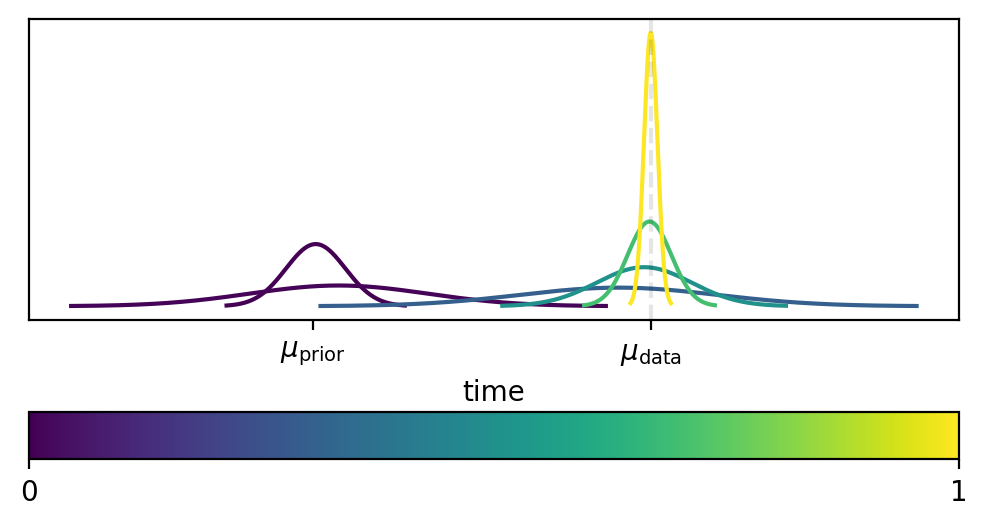

In [17]:
from discretised.bfn_discretised import *
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats

x = 1

device = 'cpu'
bfn_model = BayesianFlowNetworkDiscretised(SimpleNeuralNetworkDiscretised(), device=device, k=k).to(device)
# time, gamma -> Tensor[B, 1]
# t_linspace = torch.linspace(0.001, 1, 8).unsqueeze(1)
t_linspace = torch.tensor([0.001, 0.01, 0.3, 0.5, 0.7, 1.]).unsqueeze(1)
gamma = bfn_model.get_gamma_t(t_linspace)

# Shape-> Tensor[B, D] from the discretised data, create noisy sender sample from a normal centered around data and known variance
std_dev = torch.sqrt(gamma*(1-gamma))
mean = x*gamma


# Generate a colormap based on t_linspace
cmap = plt.cm.get_cmap('viridis')
colors = cmap(t_linspace)

# fig = plt.figure(figsize=(10, 5), dpi=200)
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(6, 3), dpi=200) 
# Plotting the normal distribution with colored lines
for i in range(len(mean)):
    x = np.linspace(mean[i] - 3*std_dev[i], mean[i] + 3*std_dev[i], 1000)
    y = stats.norm.pdf(x, mean[i], std_dev[i])
    plt.plot(x, y, color=colors[i])

# plt.suptitle('Sender Distribution over time')
# Add color bar
sm = plt.cm.ScalarMappable(cmap=cmap)
sm.set_array(t_linspace)
# sub_ax = plt.axes([0., 0.55, 0.02, 0.3]) # add a small custom axis
cbar = plt.colorbar(sm, orientation="horizontal", ax=plt.gca(),  pad=0.2)
cbar.set_ticks([0, 1])


plt.xticks([0, 1], [r'$\mu_{\text{prior}}$', r'$\mu_{\text{data}}$'])
# plt.xticks([0, 'x=1'])
plt.yticks([])
plt.xlabel('time')
plt.axvline(1, linestyle='--', color='black', alpha=0.1)
# plt.axvline(0, linestyle='--', color='black', alpha=0.1)
plt.show()
# plt.tight_layout()



